In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, LeaveOneOut, cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, Matern, DotProduct
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from plotfunc import plot_result, cross_validate_and_plot, plot_learning_curve, plot_with_err

import seaborn as sns

In [2]:
lo = LeaveOneOut()

In [3]:
data = pd.read_csv('data_tc.csv')

In [4]:
columns =  ['Fe', 'Cr', 'Ni', 'Mo',
       'Mn', 'C', 'Ti', 'Si', 'Nb', 'V', 'P', 'B', 'Al', 'N', 'S', 'Co', 'Cu',
       'W', 'As',  'HT stage 1 temperature',
       'HT stage 1 duration', 'HT stage 1 cooling', 'HT stage 2 temperature', 
        'HT stage 2 duration', 'HT stage 2 cooling']
y = data['MR M7C3_D101']

<AxesSubplot: >

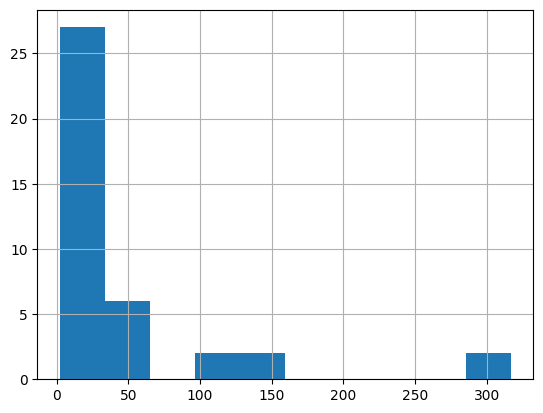

In [5]:
y.hist()

In [6]:
X = np.array(data[columns])
y = np.array(y)

# Lasso

In [7]:
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]
pipeline = Pipeline(steps)

params = {
    'lasso__alpha':np.linspace(1e-5, 1e1, 100)
}

grid = GridSearchCV(pipeline, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 100 candidates, totalling 3900 fits
[CV 1/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 1/39; 1/100] END ..lasso__alpha=1e-05;, score=-118970.774 total time=   0.0s
[CV 2/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 2/39; 1/100] END ....lasso__alpha=1e-05;, score=-8407.692 total time=   0.0s
[CV 3/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 3/39; 1/100] END .....lasso__alpha=1e-05;, score=-261.512 total time=   0.0s
[CV 4/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 4/39; 1/100] END .......lasso__alpha=1e-05;, score=-0.425 total time=   0.0s
[CV 5/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 5/39; 1/100] END .....lasso__alpha=1e-05;, score=-171.620 total time=   0.0s
[CV 6/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 6/39; 1/100] END ......lasso__alpha=1e-0

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.630e+03, tolerance: 1.927e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.318e+03, tolerance: 1.921e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.311e+01, tolerance: 1.933e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.938e+01, tolerance: 1.937e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 7/39; 2/100] END lasso__alpha=0.10102;, score=-225555631.252 total time=   0.0s
[CV 8/39; 2/100] START lasso__alpha=0.10102.....................................
[CV 8/39; 2/100] END ..lasso__alpha=0.10102;, score=-5754.387 total time=   0.0s
[CV 9/39; 2/100] START lasso__alpha=0.10102.....................................
[CV 9/39; 2/100] END ..lasso__alpha=0.10102;, score=-1128.286 total time=   0.0s
[CV 10/39; 2/100] START lasso__alpha=0.10102....................................
[CV 10/39; 2/100] END .lasso__alpha=0.10102;, score=-1057.003 total time=   0.0s
[CV 11/39; 2/100] START lasso__alpha=0.10102....................................
[CV 11/39; 2/100] END ..lasso__alpha=0.10102;, score=-530.591 total time=   0.0s
[CV 12/39; 2/100] START lasso__alpha=0.10102....................................
[CV 12/39; 2/100] END ...lasso__alpha=0.10102;, score=-67.272 total time=   0.0s
[CV 13/39; 2/100] START lasso__alpha=0.10102....................................
[CV 13/39; 2/100] END ..l

[CV 4/39; 4/100] END lasso__alpha=0.30304000000000003;, score=-3.900 total time=   0.0s
[CV 5/39; 4/100] START lasso__alpha=0.30304000000000003.........................
[CV 5/39; 4/100] END lasso__alpha=0.30304000000000003;, score=-49.347 total time=   0.0s
[CV 6/39; 4/100] START lasso__alpha=0.30304000000000003.........................
[CV 6/39; 4/100] END lasso__alpha=0.30304000000000003;, score=-58.386 total time=   0.0s
[CV 7/39; 4/100] START lasso__alpha=0.30304000000000003.........................
[CV 7/39; 4/100] END lasso__alpha=0.30304000000000003;, score=-71566869.809 total time=   0.0s
[CV 8/39; 4/100] START lasso__alpha=0.30304000000000003.........................
[CV 8/39; 4/100] END lasso__alpha=0.30304000000000003;, score=-3571.487 total time=   0.0s
[CV 9/39; 4/100] START lasso__alpha=0.30304000000000003.........................
[CV 9/39; 4/100] END lasso__alpha=0.30304000000000003;, score=-297.362 total time=   0.0s
[CV 10/39; 4/100] START lasso__alpha=0.30304000000000

[CV 33/39; 5/100] END ...lasso__alpha=0.40405;, score=-20.057 total time=   0.0s
[CV 34/39; 5/100] START lasso__alpha=0.40405....................................
[CV 34/39; 5/100] END ..lasso__alpha=0.40405;, score=-139.643 total time=   0.0s
[CV 35/39; 5/100] START lasso__alpha=0.40405....................................
[CV 35/39; 5/100] END ....lasso__alpha=0.40405;, score=-0.683 total time=   0.0s
[CV 36/39; 5/100] START lasso__alpha=0.40405....................................
[CV 36/39; 5/100] END ..lasso__alpha=0.40405;, score=-157.563 total time=   0.0s
[CV 37/39; 5/100] START lasso__alpha=0.40405....................................
[CV 37/39; 5/100] END ...lasso__alpha=0.40405;, score=-81.072 total time=   0.0s
[CV 38/39; 5/100] START lasso__alpha=0.40405....................................
[CV 38/39; 5/100] END ..lasso__alpha=0.40405;, score=-195.988 total time=   0.0s
[CV 39/39; 5/100] START lasso__alpha=0.40405....................................
[CV 39/39; 5/100] END .lasso

[CV 35/39; 7/100] END ...lasso__alpha=0.60607;, score=-10.168 total time=   0.0s
[CV 36/39; 7/100] START lasso__alpha=0.60607....................................
[CV 36/39; 7/100] END ..lasso__alpha=0.60607;, score=-167.035 total time=   0.0s
[CV 37/39; 7/100] START lasso__alpha=0.60607....................................
[CV 37/39; 7/100] END ...lasso__alpha=0.60607;, score=-87.519 total time=   0.0s
[CV 38/39; 7/100] START lasso__alpha=0.60607....................................
[CV 38/39; 7/100] END ..lasso__alpha=0.60607;, score=-341.778 total time=   0.0s
[CV 39/39; 7/100] START lasso__alpha=0.60607....................................
[CV 39/39; 7/100] END .lasso__alpha=0.60607;, score=-3096.301 total time=   0.0s
[CV 1/39; 8/100] START lasso__alpha=0.7070799999999999..........................
[CV 1/39; 8/100] END lasso__alpha=0.7070799999999999;, score=-17161.470 total time=   0.0s
[CV 2/39; 8/100] START lasso__alpha=0.7070799999999999..........................
[CV 2/39; 8/100] E

[CV 13/39; 10/100] END ..lasso__alpha=0.9091;, score=-647.932 total time=   0.0s
[CV 14/39; 10/100] START lasso__alpha=0.9091....................................
[CV 14/39; 10/100] END ....lasso__alpha=0.9091;, score=-5.181 total time=   0.0s
[CV 15/39; 10/100] START lasso__alpha=0.9091....................................
[CV 15/39; 10/100] END lasso__alpha=0.9091;, score=-88266.073 total time=   0.0s
[CV 16/39; 10/100] START lasso__alpha=0.9091....................................
[CV 16/39; 10/100] END ..lasso__alpha=0.9091;, score=-306.489 total time=   0.0s
[CV 17/39; 10/100] START lasso__alpha=0.9091....................................
[CV 17/39; 10/100] END ...lasso__alpha=0.9091;, score=-55.261 total time=   0.0s
[CV 18/39; 10/100] START lasso__alpha=0.9091....................................
[CV 18/39; 10/100] END ....lasso__alpha=0.9091;, score=-3.458 total time=   0.0s
[CV 19/39; 10/100] START lasso__alpha=0.9091....................................
[CV 19/39; 10/100] END ...la

[CV 22/39; 12/100] END ..lasso__alpha=1.11112;, score=-94.113 total time=   0.0s
[CV 23/39; 12/100] START lasso__alpha=1.11112...................................
[CV 23/39; 12/100] END .lasso__alpha=1.11112;, score=-850.604 total time=   0.0s
[CV 24/39; 12/100] START lasso__alpha=1.11112...................................
[CV 24/39; 12/100] END .lasso__alpha=1.11112;, score=-825.327 total time=   0.0s
[CV 25/39; 12/100] START lasso__alpha=1.11112...................................
[CV 25/39; 12/100] END .lasso__alpha=1.11112;, score=-200.075 total time=   0.0s
[CV 26/39; 12/100] START lasso__alpha=1.11112...................................
[CV 26/39; 12/100] END .lasso__alpha=1.11112;, score=-174.146 total time=   0.0s
[CV 27/39; 12/100] START lasso__alpha=1.11112...................................
[CV 27/39; 12/100] END lasso__alpha=1.11112;, score=-3835.022 total time=   0.0s
[CV 28/39; 12/100] START lasso__alpha=1.11112...................................
[CV 28/39; 12/100] END .lass

[CV 26/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-178.843 total time=   0.0s
[CV 27/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 27/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-3713.372 total time=   0.0s
[CV 28/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 28/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-579.206 total time=   0.0s
[CV 29/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 29/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-1020.918 total time=   0.0s
[CV 30/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 30/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-7.915 total time=   0.0s
[CV 31/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 31/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-106.059 total time=   0.0s
[CV 32/39; 14/100] START lasso__alpha=1.313140000

[CV 1/39; 17/100] END lasso__alpha=1.61617;, score=-19216.323 total time=   0.0s
[CV 2/39; 17/100] START lasso__alpha=1.61617....................................
[CV 2/39; 17/100] END .lasso__alpha=1.61617;, score=-1314.964 total time=   0.0s
[CV 3/39; 17/100] START lasso__alpha=1.61617....................................
[CV 3/39; 17/100] END ..lasso__alpha=1.61617;, score=-148.048 total time=   0.0s
[CV 4/39; 17/100] START lasso__alpha=1.61617....................................
[CV 4/39; 17/100] END ...lasso__alpha=1.61617;, score=-18.351 total time=   0.0s
[CV 5/39; 17/100] START lasso__alpha=1.61617....................................
[CV 5/39; 17/100] END ....lasso__alpha=1.61617;, score=-4.398 total time=   0.0s
[CV 6/39; 17/100] START lasso__alpha=1.61617....................................
[CV 6/39; 17/100] END ...lasso__alpha=1.61617;, score=-75.208 total time=   0.0s
[CV 7/39; 17/100] START lasso__alpha=1.61617....................................
[CV 7/39; 17/100] END ..lass

[CV 5/39; 20/100] END .....lasso__alpha=1.9192;, score=-1.144 total time=   0.0s
[CV 6/39; 20/100] START lasso__alpha=1.9192.....................................
[CV 6/39; 20/100] END ....lasso__alpha=1.9192;, score=-78.745 total time=   0.0s
[CV 7/39; 20/100] START lasso__alpha=1.9192.....................................
[CV 7/39; 20/100] END ...lasso__alpha=1.9192;, score=-461.145 total time=   0.0s
[CV 8/39; 20/100] START lasso__alpha=1.9192.....................................
[CV 8/39; 20/100] END ..lasso__alpha=1.9192;, score=-1583.206 total time=   0.0s
[CV 9/39; 20/100] START lasso__alpha=1.9192.....................................
[CV 9/39; 20/100] END .....lasso__alpha=1.9192;, score=-0.015 total time=   0.0s
[CV 10/39; 20/100] START lasso__alpha=1.9192....................................
[CV 10/39; 20/100] END ..lasso__alpha=1.9192;, score=-162.529 total time=   0.0s
[CV 11/39; 20/100] START lasso__alpha=1.9192....................................
[CV 11/39; 20/100] END ..las

[CV 9/39; 23/100] END ....lasso__alpha=2.22223;, score=-3.093 total time=   0.0s
[CV 10/39; 23/100] START lasso__alpha=2.22223...................................
[CV 10/39; 23/100] END .lasso__alpha=2.22223;, score=-121.735 total time=   0.0s
[CV 11/39; 23/100] START lasso__alpha=2.22223...................................
[CV 11/39; 23/100] END .lasso__alpha=2.22223;, score=-769.022 total time=   0.0s
[CV 12/39; 23/100] START lasso__alpha=2.22223...................................
[CV 12/39; 23/100] END .lasso__alpha=2.22223;, score=-101.119 total time=   0.0s
[CV 13/39; 23/100] START lasso__alpha=2.22223...................................
[CV 13/39; 23/100] END .lasso__alpha=2.22223;, score=-678.103 total time=   0.0s
[CV 14/39; 23/100] START lasso__alpha=2.22223...................................
[CV 14/39; 23/100] END ..lasso__alpha=2.22223;, score=-41.163 total time=   0.0s
[CV 15/39; 23/100] START lasso__alpha=2.22223...................................
[CV 15/39; 23/100] END lasso

[CV 5/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-1.058 total time=   0.0s
[CV 6/39; 26/100] START lasso__alpha=2.5252600000000003.........................
[CV 6/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-90.701 total time=   0.0s
[CV 7/39; 26/100] START lasso__alpha=2.5252600000000003.........................
[CV 7/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-755.112 total time=   0.0s
[CV 8/39; 26/100] START lasso__alpha=2.5252600000000003.........................
[CV 8/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-1269.448 total time=   0.0s
[CV 9/39; 26/100] START lasso__alpha=2.5252600000000003.........................
[CV 9/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-10.215 total time=   0.0s
[CV 10/39; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 10/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-94.231 total time=   0.0s
[CV 11/39; 26/100] START lasso__alpha=2.5252600000000003..

[CV 38/39; 28/100] END lasso__alpha=2.72728;, score=-3557.197 total time=   0.0s
[CV 39/39; 28/100] START lasso__alpha=2.72728...................................
[CV 39/39; 28/100] END lasso__alpha=2.72728;, score=-3829.234 total time=   0.0s
[CV 1/39; 29/100] START lasso__alpha=2.82829....................................
[CV 1/39; 29/100] END lasso__alpha=2.82829;, score=-19885.927 total time=   0.0s
[CV 2/39; 29/100] START lasso__alpha=2.82829....................................
[CV 2/39; 29/100] END .lasso__alpha=2.82829;, score=-1575.119 total time=   0.0s
[CV 3/39; 29/100] START lasso__alpha=2.82829....................................
[CV 3/39; 29/100] END ..lasso__alpha=2.82829;, score=-150.735 total time=   0.0s
[CV 4/39; 29/100] START lasso__alpha=2.82829....................................
[CV 4/39; 29/100] END ...lasso__alpha=2.82829;, score=-39.237 total time=   0.0s
[CV 5/39; 29/100] START lasso__alpha=2.82829....................................
[CV 5/39; 29/100] END ....la

[CV 11/39; 31/100] END .lasso__alpha=3.03031;, score=-692.987 total time=   0.0s
[CV 12/39; 31/100] START lasso__alpha=3.03031...................................
[CV 12/39; 31/100] END .lasso__alpha=3.03031;, score=-108.691 total time=   0.0s
[CV 13/39; 31/100] START lasso__alpha=3.03031...................................
[CV 13/39; 31/100] END .lasso__alpha=3.03031;, score=-603.323 total time=   0.0s
[CV 14/39; 31/100] START lasso__alpha=3.03031...................................
[CV 14/39; 31/100] END ..lasso__alpha=3.03031;, score=-50.626 total time=   0.0s
[CV 15/39; 31/100] START lasso__alpha=3.03031...................................
[CV 15/39; 31/100] END lasso__alpha=3.03031;, score=-94538.335 total time=   0.0s
[CV 16/39; 31/100] START lasso__alpha=3.03031...................................
[CV 16/39; 31/100] END .lasso__alpha=3.03031;, score=-546.595 total time=   0.0s
[CV 17/39; 31/100] START lasso__alpha=3.03031...................................
[CV 17/39; 31/100] END ..la

[CV 30/39; 33/100] END .lasso__alpha=3.23233;, score=-257.321 total time=   0.0s
[CV 31/39; 33/100] START lasso__alpha=3.23233...................................
[CV 31/39; 33/100] END .lasso__alpha=3.23233;, score=-397.240 total time=   0.0s
[CV 32/39; 33/100] START lasso__alpha=3.23233...................................
[CV 32/39; 33/100] END lasso__alpha=3.23233;, score=-3868.248 total time=   0.0s
[CV 33/39; 33/100] START lasso__alpha=3.23233...................................
[CV 33/39; 33/100] END ..lasso__alpha=3.23233;, score=-50.530 total time=   0.0s
[CV 34/39; 33/100] START lasso__alpha=3.23233...................................
[CV 34/39; 33/100] END ..lasso__alpha=3.23233;, score=-34.783 total time=   0.0s
[CV 35/39; 33/100] START lasso__alpha=3.23233...................................
[CV 35/39; 33/100] END .lasso__alpha=3.23233;, score=-373.479 total time=   0.0s
[CV 36/39; 33/100] START lasso__alpha=3.23233...................................
[CV 36/39; 33/100] END .lass

[CV 32/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-3884.053 total time=   0.0s
[CV 33/39; 35/100] START lasso__alpha=3.4343500000000002........................
[CV 33/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-50.433 total time=   0.0s
[CV 34/39; 35/100] START lasso__alpha=3.4343500000000002........................
[CV 34/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-32.109 total time=   0.0s
[CV 35/39; 35/100] START lasso__alpha=3.4343500000000002........................
[CV 35/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-421.113 total time=   0.0s
[CV 36/39; 35/100] START lasso__alpha=3.4343500000000002........................
[CV 36/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-196.993 total time=   0.0s
[CV 37/39; 35/100] START lasso__alpha=3.4343500000000002........................
[CV 37/39; 35/100] END lasso__alpha=3.4343500000000002;, score=-158.588 total time=   0.0s
[CV 38/39; 35/100] START lasso__alpha=3.4343500000

[CV 18/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-135.912 total time=   0.0s
[CV 19/39; 38/100] START lasso__alpha=3.7373800000000004........................
[CV 19/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-497.875 total time=   0.0s
[CV 20/39; 38/100] START lasso__alpha=3.7373800000000004........................
[CV 20/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-204.077 total time=   0.0s
[CV 21/39; 38/100] START lasso__alpha=3.7373800000000004........................
[CV 21/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-48.777 total time=   0.0s
[CV 22/39; 38/100] START lasso__alpha=3.7373800000000004........................
[CV 22/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-176.564 total time=   0.0s
[CV 23/39; 38/100] START lasso__alpha=3.7373800000000004........................
[CV 23/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-6305.994 total time=   0.0s
[CV 24/39; 38/100] START lasso__alpha=3.737380000

[CV 32/39; 40/100] END .lasso__alpha=3.9394;, score=-3923.376 total time=   0.0s
[CV 33/39; 40/100] START lasso__alpha=3.9394....................................
[CV 33/39; 40/100] END ...lasso__alpha=3.9394;, score=-50.198 total time=   0.0s
[CV 34/39; 40/100] START lasso__alpha=3.9394....................................
[CV 34/39; 40/100] END ...lasso__alpha=3.9394;, score=-25.884 total time=   0.0s
[CV 35/39; 40/100] START lasso__alpha=3.9394....................................
[CV 35/39; 40/100] END ..lasso__alpha=3.9394;, score=-552.027 total time=   0.0s
[CV 36/39; 40/100] START lasso__alpha=3.9394....................................
[CV 36/39; 40/100] END ..lasso__alpha=3.9394;, score=-208.872 total time=   0.0s
[CV 37/39; 40/100] START lasso__alpha=3.9394....................................
[CV 37/39; 40/100] END ..lasso__alpha=3.9394;, score=-189.087 total time=   0.0s
[CV 38/39; 40/100] START lasso__alpha=3.9394....................................
[CV 38/39; 40/100] END .lass

[CV 2/39; 43/100] END .lasso__alpha=4.24243;, score=-1721.102 total time=   0.0s
[CV 3/39; 43/100] START lasso__alpha=4.24243....................................
[CV 3/39; 43/100] END ..lasso__alpha=4.24243;, score=-142.874 total time=   0.0s
[CV 4/39; 43/100] START lasso__alpha=4.24243....................................
[CV 4/39; 43/100] END ...lasso__alpha=4.24243;, score=-61.106 total time=   0.0s
[CV 5/39; 43/100] START lasso__alpha=4.24243....................................
[CV 5/39; 43/100] END ...lasso__alpha=4.24243;, score=-21.957 total time=   0.0s
[CV 6/39; 43/100] START lasso__alpha=4.24243....................................
[CV 6/39; 43/100] END ..lasso__alpha=4.24243;, score=-105.853 total time=   0.0s
[CV 7/39; 43/100] START lasso__alpha=4.24243....................................
[CV 7/39; 43/100] END .lasso__alpha=4.24243;, score=-2186.670 total time=   0.0s
[CV 8/39; 43/100] START lasso__alpha=4.24243....................................
[CV 8/39; 43/100] END ..lass

[CV 16/39; 45/100] END .lasso__alpha=4.44445;, score=-778.088 total time=   0.0s
[CV 17/39; 45/100] START lasso__alpha=4.44445...................................
[CV 17/39; 45/100] END ..lasso__alpha=4.44445;, score=-20.337 total time=   0.0s
[CV 18/39; 45/100] START lasso__alpha=4.44445...................................
[CV 18/39; 45/100] END .lasso__alpha=4.44445;, score=-241.510 total time=   0.0s
[CV 19/39; 45/100] START lasso__alpha=4.44445...................................
[CV 19/39; 45/100] END .lasso__alpha=4.44445;, score=-672.706 total time=   0.0s
[CV 20/39; 45/100] START lasso__alpha=4.44445...................................
[CV 20/39; 45/100] END .lasso__alpha=4.44445;, score=-220.109 total time=   0.0s
[CV 21/39; 45/100] START lasso__alpha=4.44445...................................
[CV 21/39; 45/100] END .lasso__alpha=4.44445;, score=-113.857 total time=   0.0s
[CV 22/39; 45/100] START lasso__alpha=4.44445...................................
[CV 22/39; 45/100] END .lass

[CV 33/39; 47/100] END ..lasso__alpha=4.64647;, score=-42.132 total time=   0.0s
[CV 34/39; 47/100] START lasso__alpha=4.64647...................................
[CV 34/39; 47/100] END ..lasso__alpha=4.64647;, score=-19.963 total time=   0.0s
[CV 35/39; 47/100] START lasso__alpha=4.64647...................................
[CV 35/39; 47/100] END .lasso__alpha=4.64647;, score=-724.100 total time=   0.0s
[CV 36/39; 47/100] START lasso__alpha=4.64647...................................
[CV 36/39; 47/100] END .lasso__alpha=4.64647;, score=-224.353 total time=   0.0s
[CV 37/39; 47/100] START lasso__alpha=4.64647...................................
[CV 37/39; 47/100] END .lasso__alpha=4.64647;, score=-238.795 total time=   0.0s
[CV 38/39; 47/100] START lasso__alpha=4.64647...................................
[CV 38/39; 47/100] END lasso__alpha=4.64647;, score=-8946.109 total time=   0.0s
[CV 39/39; 47/100] START lasso__alpha=4.64647...................................
[CV 39/39; 47/100] END lasso

[CV 26/39; 50/100] END ..lasso__alpha=4.9495;, score=-301.411 total time=   0.0s
[CV 27/39; 50/100] START lasso__alpha=4.9495....................................
[CV 27/39; 50/100] END .lasso__alpha=4.9495;, score=-3309.586 total time=   0.0s
[CV 28/39; 50/100] START lasso__alpha=4.9495....................................
[CV 28/39; 50/100] END ..lasso__alpha=4.9495;, score=-879.948 total time=   0.0s
[CV 29/39; 50/100] START lasso__alpha=4.9495....................................
[CV 29/39; 50/100] END .lasso__alpha=4.9495;, score=-3191.263 total time=   0.0s
[CV 30/39; 50/100] START lasso__alpha=4.9495....................................
[CV 30/39; 50/100] END ..lasso__alpha=4.9495;, score=-607.746 total time=   0.0s
[CV 31/39; 50/100] START lasso__alpha=4.9495....................................
[CV 31/39; 50/100] END ..lasso__alpha=4.9495;, score=-712.413 total time=   0.0s
[CV 32/39; 50/100] START lasso__alpha=4.9495....................................
[CV 32/39; 50/100] END .lass

[CV 2/39; 53/100] END .lasso__alpha=5.25253;, score=-1533.001 total time=   0.0s
[CV 3/39; 53/100] START lasso__alpha=5.25253....................................
[CV 3/39; 53/100] END ...lasso__alpha=5.25253;, score=-86.286 total time=   0.0s
[CV 4/39; 53/100] START lasso__alpha=5.25253....................................
[CV 4/39; 53/100] END ...lasso__alpha=5.25253;, score=-36.601 total time=   0.0s
[CV 5/39; 53/100] START lasso__alpha=5.25253....................................
[CV 5/39; 53/100] END ...lasso__alpha=5.25253;, score=-16.870 total time=   0.0s
[CV 6/39; 53/100] START lasso__alpha=5.25253....................................
[CV 6/39; 53/100] END ...lasso__alpha=5.25253;, score=-65.312 total time=   0.0s
[CV 7/39; 53/100] START lasso__alpha=5.25253....................................
[CV 7/39; 53/100] END .lasso__alpha=5.25253;, score=-2072.971 total time=   0.0s
[CV 8/39; 53/100] START lasso__alpha=5.25253....................................
[CV 8/39; 53/100] END ..lass

[CV 4/39; 55/100] END lasso__alpha=5.454549999999999;, score=-32.172 total time=   0.0s
[CV 5/39; 55/100] START lasso__alpha=5.454549999999999..........................
[CV 5/39; 55/100] END lasso__alpha=5.454549999999999;, score=-15.429 total time=   0.0s
[CV 6/39; 55/100] START lasso__alpha=5.454549999999999..........................
[CV 6/39; 55/100] END lasso__alpha=5.454549999999999;, score=-57.781 total time=   0.0s
[CV 7/39; 55/100] START lasso__alpha=5.454549999999999..........................
[CV 7/39; 55/100] END lasso__alpha=5.454549999999999;, score=-1958.185 total time=   0.0s
[CV 8/39; 55/100] START lasso__alpha=5.454549999999999..........................
[CV 8/39; 55/100] END lasso__alpha=5.454549999999999;, score=-544.220 total time=   0.0s
[CV 9/39; 55/100] START lasso__alpha=5.454549999999999..........................
[CV 9/39; 55/100] END lasso__alpha=5.454549999999999;, score=-316.648 total time=   0.0s
[CV 10/39; 55/100] START lasso__alpha=5.454549999999999........

[CV 18/39; 57/100] END lasso__alpha=5.656569999999999;, score=-314.469 total time=   0.0s
[CV 19/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 19/39; 57/100] END lasso__alpha=5.656569999999999;, score=-853.538 total time=   0.0s
[CV 20/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 20/39; 57/100] END lasso__alpha=5.656569999999999;, score=-241.908 total time=   0.0s
[CV 21/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 21/39; 57/100] END lasso__alpha=5.656569999999999;, score=-289.287 total time=   0.0s
[CV 22/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 22/39; 57/100] END lasso__alpha=5.656569999999999;, score=-313.974 total time=   0.0s
[CV 23/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 23/39; 57/100] END lasso__alpha=5.656569999999999;, score=-11950.295 total time=   0.0s
[CV 24/39; 57/100] START lasso__alpha=5.6565699999999

[CV 20/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-242.763 total time=   0.0s
[CV 21/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 21/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-303.180 total time=   0.0s
[CV 22/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 22/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-314.722 total time=   0.0s
[CV 23/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 23/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-12542.374 total time=   0.0s
[CV 24/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 24/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-19.973 total time=   0.0s
[CV 25/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 25/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-56.802 total time=   0.0s
[CV 26/39; 59/100] START lasso__alpha=5.858589999

[CV 5/39; 62/100] END ....lasso__alpha=6.16162;, score=-9.031 total time=   0.0s
[CV 6/39; 62/100] START lasso__alpha=6.16162....................................
[CV 6/39; 62/100] END ...lasso__alpha=6.16162;, score=-39.236 total time=   0.0s
[CV 7/39; 62/100] START lasso__alpha=6.16162....................................
[CV 7/39; 62/100] END .lasso__alpha=6.16162;, score=-1582.463 total time=   0.0s
[CV 8/39; 62/100] START lasso__alpha=6.16162....................................
[CV 8/39; 62/100] END ..lasso__alpha=6.16162;, score=-480.097 total time=   0.0s
[CV 9/39; 62/100] START lasso__alpha=6.16162....................................
[CV 9/39; 62/100] END ..lasso__alpha=6.16162;, score=-279.975 total time=   0.0s
[CV 10/39; 62/100] START lasso__alpha=6.16162...................................
[CV 10/39; 62/100] END ..lasso__alpha=6.16162;, score=-16.188 total time=   0.0s
[CV 11/39; 62/100] START lasso__alpha=6.16162...................................
[CV 11/39; 62/100] END .lass

[CV 25/39; 64/100] END ..lasso__alpha=6.36364;, score=-62.927 total time=   0.0s
[CV 26/39; 64/100] START lasso__alpha=6.36364...................................
[CV 26/39; 64/100] END .lasso__alpha=6.36364;, score=-305.980 total time=   0.0s
[CV 27/39; 64/100] START lasso__alpha=6.36364...................................
[CV 27/39; 64/100] END lasso__alpha=6.36364;, score=-3323.210 total time=   0.0s
[CV 28/39; 64/100] START lasso__alpha=6.36364...................................
[CV 28/39; 64/100] END .lasso__alpha=6.36364;, score=-724.075 total time=   0.0s
[CV 29/39; 64/100] START lasso__alpha=6.36364...................................
[CV 29/39; 64/100] END lasso__alpha=6.36364;, score=-3645.529 total time=   0.0s
[CV 30/39; 64/100] START lasso__alpha=6.36364...................................
[CV 30/39; 64/100] END .lasso__alpha=6.36364;, score=-932.820 total time=   0.0s
[CV 31/39; 64/100] START lasso__alpha=6.36364...................................
[CV 31/39; 64/100] END .lass

[CV 20/39; 67/100] END .lasso__alpha=6.66667;, score=-246.227 total time=   0.0s
[CV 21/39; 67/100] START lasso__alpha=6.66667...................................
[CV 21/39; 67/100] END .lasso__alpha=6.66667;, score=-352.091 total time=   0.0s
[CV 22/39; 67/100] START lasso__alpha=6.66667...................................
[CV 22/39; 67/100] END .lasso__alpha=6.66667;, score=-317.768 total time=   0.0s
[CV 23/39; 67/100] START lasso__alpha=6.66667...................................
[CV 23/39; 67/100] END lasso__alpha=6.66667;, score=-15052.223 total time=   0.0s
[CV 24/39; 67/100] START lasso__alpha=6.66667...................................
[CV 24/39; 67/100] END ..lasso__alpha=6.66667;, score=-22.262 total time=   0.0s
[CV 25/39; 67/100] START lasso__alpha=6.66667...................................
[CV 25/39; 67/100] END ..lasso__alpha=6.66667;, score=-66.762 total time=   0.0s
[CV 26/39; 67/100] START lasso__alpha=6.66667...................................
[CV 26/39; 67/100] END .las

[CV 6/39; 70/100] END ....lasso__alpha=6.9697;, score=-23.217 total time=   0.0s
[CV 7/39; 70/100] START lasso__alpha=6.9697.....................................
[CV 7/39; 70/100] END ..lasso__alpha=6.9697;, score=-1195.270 total time=   0.0s
[CV 8/39; 70/100] START lasso__alpha=6.9697.....................................
[CV 8/39; 70/100] END ...lasso__alpha=6.9697;, score=-447.204 total time=   0.0s
[CV 9/39; 70/100] START lasso__alpha=6.9697.....................................
[CV 9/39; 70/100] END ...lasso__alpha=6.9697;, score=-240.819 total time=   0.0s
[CV 10/39; 70/100] START lasso__alpha=6.9697....................................
[CV 10/39; 70/100] END ...lasso__alpha=6.9697;, score=-10.198 total time=   0.0s
[CV 11/39; 70/100] START lasso__alpha=6.9697....................................
[CV 11/39; 70/100] END ..lasso__alpha=6.9697;, score=-327.776 total time=   0.0s
[CV 12/39; 70/100] START lasso__alpha=6.9697....................................
[CV 12/39; 70/100] END ...la

[CV 20/39; 72/100] END .lasso__alpha=7.17172;, score=-248.359 total time=   0.0s
[CV 21/39; 72/100] START lasso__alpha=7.17172...................................
[CV 21/39; 72/100] END .lasso__alpha=7.17172;, score=-384.531 total time=   0.0s
[CV 22/39; 72/100] START lasso__alpha=7.17172...................................
[CV 22/39; 72/100] END .lasso__alpha=7.17172;, score=-319.704 total time=   0.0s
[CV 23/39; 72/100] START lasso__alpha=7.17172...................................
[CV 23/39; 72/100] END lasso__alpha=7.17172;, score=-16722.328 total time=   0.0s
[CV 24/39; 72/100] START lasso__alpha=7.17172...................................
[CV 24/39; 72/100] END ..lasso__alpha=7.17172;, score=-23.753 total time=   0.0s
[CV 25/39; 72/100] START lasso__alpha=7.17172...................................
[CV 25/39; 72/100] END ..lasso__alpha=7.17172;, score=-73.417 total time=   0.0s
[CV 26/39; 72/100] START lasso__alpha=7.17172...................................
[CV 26/39; 72/100] END .las

[CV 5/39; 75/100] END ....lasso__alpha=7.47475;, score=-1.343 total time=   0.0s
[CV 6/39; 75/100] START lasso__alpha=7.47475....................................
[CV 6/39; 75/100] END ...lasso__alpha=7.47475;, score=-13.917 total time=   0.0s
[CV 7/39; 75/100] START lasso__alpha=7.47475....................................
[CV 7/39; 75/100] END ..lasso__alpha=7.47475;, score=-963.735 total time=   0.0s
[CV 8/39; 75/100] START lasso__alpha=7.47475....................................
[CV 8/39; 75/100] END ..lasso__alpha=7.47475;, score=-426.203 total time=   0.0s
[CV 9/39; 75/100] START lasso__alpha=7.47475....................................
[CV 9/39; 75/100] END ..lasso__alpha=7.47475;, score=-217.896 total time=   0.0s
[CV 10/39; 75/100] START lasso__alpha=7.47475...................................
[CV 10/39; 75/100] END ...lasso__alpha=7.47475;, score=-5.652 total time=   0.0s
[CV 11/39; 75/100] START lasso__alpha=7.47475...................................
[CV 11/39; 75/100] END .lass

[CV 28/39; 77/100] END lasso__alpha=7.676769999999999;, score=-568.811 total time=   0.0s
[CV 29/39; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 29/39; 77/100] END lasso__alpha=7.676769999999999;, score=-3893.915 total time=   0.0s
[CV 30/39; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 30/39; 77/100] END lasso__alpha=7.676769999999999;, score=-1243.127 total time=   0.0s
[CV 31/39; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 31/39; 77/100] END lasso__alpha=7.676769999999999;, score=-1246.232 total time=   0.0s
[CV 32/39; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 32/39; 77/100] END lasso__alpha=7.676769999999999;, score=-4007.534 total time=   0.0s
[CV 33/39; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 33/39; 77/100] END lasso__alpha=7.676769999999999;, score=-39.464 total time=   0.0s
[CV 34/39; 77/100] START lasso__alpha=7.676769999999

[CV 36/39; 80/100] END ..lasso__alpha=7.9798;, score=-252.017 total time=   0.0s
[CV 37/39; 80/100] START lasso__alpha=7.9798....................................
[CV 37/39; 80/100] END ..lasso__alpha=7.9798;, score=-322.888 total time=   0.0s
[CV 38/39; 80/100] START lasso__alpha=7.9798....................................
[CV 38/39; 80/100] END lasso__alpha=7.9798;, score=-19577.249 total time=   0.0s
[CV 39/39; 80/100] START lasso__alpha=7.9798....................................
[CV 39/39; 80/100] END .lasso__alpha=7.9798;, score=-3993.816 total time=   0.0s
[CV 1/39; 81/100] START lasso__alpha=8.08081....................................
[CV 1/39; 81/100] END lasso__alpha=8.08081;, score=-11624.816 total time=   0.0s
[CV 2/39; 81/100] START lasso__alpha=8.08081....................................
[CV 2/39; 81/100] END .lasso__alpha=8.08081;, score=-1160.878 total time=   0.0s
[CV 3/39; 81/100] START lasso__alpha=8.08081....................................
[CV 3/39; 81/100] END ....la

[CV 16/39; 83/100] END .lasso__alpha=8.28283;, score=-801.743 total time=   0.0s
[CV 17/39; 83/100] START lasso__alpha=8.28283...................................
[CV 17/39; 83/100] END ...lasso__alpha=8.28283;, score=-0.713 total time=   0.0s
[CV 18/39; 83/100] START lasso__alpha=8.28283...................................
[CV 18/39; 83/100] END .lasso__alpha=8.28283;, score=-276.486 total time=   0.0s
[CV 19/39; 83/100] START lasso__alpha=8.28283...................................
[CV 19/39; 83/100] END .lasso__alpha=8.28283;, score=-829.340 total time=   0.0s
[CV 20/39; 83/100] START lasso__alpha=8.28283...................................
[CV 20/39; 83/100] END .lasso__alpha=8.28283;, score=-253.423 total time=   0.0s
[CV 21/39; 83/100] START lasso__alpha=8.28283...................................
[CV 21/39; 83/100] END .lasso__alpha=8.28283;, score=-436.082 total time=   0.0s
[CV 22/39; 83/100] START lasso__alpha=8.28283...................................
[CV 22/39; 83/100] END .lass

[CV 39/39; 85/100] END lasso__alpha=8.48485;, score=-3970.442 total time=   0.0s
[CV 1/39; 86/100] START lasso__alpha=8.58586....................................
[CV 1/39; 86/100] END lasso__alpha=8.58586;, score=-10982.816 total time=   0.0s
[CV 2/39; 86/100] START lasso__alpha=8.58586....................................
[CV 2/39; 86/100] END .lasso__alpha=8.58586;, score=-1102.918 total time=   0.0s
[CV 3/39; 86/100] START lasso__alpha=8.58586....................................
[CV 3/39; 86/100] END ....lasso__alpha=8.58586;, score=-2.785 total time=   0.0s
[CV 4/39; 86/100] START lasso__alpha=8.58586....................................
[CV 4/39; 86/100] END ....lasso__alpha=8.58586;, score=-0.002 total time=   0.0s
[CV 5/39; 86/100] START lasso__alpha=8.58586....................................
[CV 5/39; 86/100] END ....lasso__alpha=8.58586;, score=-0.334 total time=   0.0s
[CV 6/39; 86/100] START lasso__alpha=8.58586....................................
[CV 6/39; 86/100] END ....la

[CV 25/39; 88/100] END ..lasso__alpha=8.78788;, score=-87.873 total time=   0.0s
[CV 26/39; 88/100] START lasso__alpha=8.78788...................................
[CV 26/39; 88/100] END .lasso__alpha=8.78788;, score=-347.897 total time=   0.0s
[CV 27/39; 88/100] START lasso__alpha=8.78788...................................
[CV 27/39; 88/100] END lasso__alpha=8.78788;, score=-3952.107 total time=   0.0s
[CV 28/39; 88/100] START lasso__alpha=8.78788...................................
[CV 28/39; 88/100] END .lasso__alpha=8.78788;, score=-449.843 total time=   0.0s
[CV 29/39; 88/100] START lasso__alpha=8.78788...................................
[CV 29/39; 88/100] END lasso__alpha=8.78788;, score=-4095.885 total time=   0.0s
[CV 30/39; 88/100] START lasso__alpha=8.78788...................................
[CV 30/39; 88/100] END lasso__alpha=8.78788;, score=-1432.836 total time=   0.0s
[CV 31/39; 88/100] START lasso__alpha=8.78788...................................
[CV 31/39; 88/100] END lasso

[CV 36/39; 90/100] END ..lasso__alpha=8.9899;, score=-261.687 total time=   0.0s
[CV 37/39; 90/100] START lasso__alpha=8.9899....................................
[CV 37/39; 90/100] END ..lasso__alpha=8.9899;, score=-332.569 total time=   0.0s
[CV 38/39; 90/100] START lasso__alpha=8.9899....................................
[CV 38/39; 90/100] END lasso__alpha=8.9899;, score=-23393.810 total time=   0.0s
[CV 39/39; 90/100] START lasso__alpha=8.9899....................................
[CV 39/39; 90/100] END .lasso__alpha=8.9899;, score=-3963.041 total time=   0.0s
[CV 1/39; 91/100] START lasso__alpha=9.09091....................................
[CV 1/39; 91/100] END lasso__alpha=9.09091;, score=-10359.057 total time=   0.0s
[CV 2/39; 91/100] START lasso__alpha=9.09091....................................
[CV 2/39; 91/100] END .lasso__alpha=9.09091;, score=-1045.498 total time=   0.0s
[CV 3/39; 91/100] START lasso__alpha=9.09091....................................
[CV 3/39; 91/100] END ....la

[CV 35/39; 92/100] END .lasso__alpha=9.19192;, score=-777.991 total time=   0.0s
[CV 36/39; 92/100] START lasso__alpha=9.19192...................................
[CV 36/39; 92/100] END .lasso__alpha=9.19192;, score=-264.336 total time=   0.0s
[CV 37/39; 92/100] START lasso__alpha=9.19192...................................
[CV 37/39; 92/100] END .lasso__alpha=9.19192;, score=-335.175 total time=   0.0s
[CV 38/39; 92/100] START lasso__alpha=9.19192...................................
[CV 38/39; 92/100] END lasso__alpha=9.19192;, score=-24192.938 total time=   0.0s
[CV 39/39; 92/100] START lasso__alpha=9.19192...................................
[CV 39/39; 92/100] END lasso__alpha=9.19192;, score=-3963.136 total time=   0.0s
[CV 1/39; 93/100] START lasso__alpha=9.29293....................................
[CV 1/39; 93/100] END lasso__alpha=9.29293;, score=-10114.659 total time=   0.0s
[CV 2/39; 93/100] START lasso__alpha=9.29293....................................
[CV 2/39; 93/100] END .lass

[CV 23/39; 95/100] END lasso__alpha=9.49495;, score=-25416.786 total time=   0.0s
[CV 24/39; 95/100] START lasso__alpha=9.49495...................................
[CV 24/39; 95/100] END ..lasso__alpha=9.49495;, score=-11.817 total time=   0.0s
[CV 25/39; 95/100] START lasso__alpha=9.49495...................................
[CV 25/39; 95/100] END ..lasso__alpha=9.49495;, score=-83.552 total time=   0.0s
[CV 26/39; 95/100] START lasso__alpha=9.49495...................................
[CV 26/39; 95/100] END .lasso__alpha=9.49495;, score=-330.542 total time=   0.0s
[CV 27/39; 95/100] START lasso__alpha=9.49495...................................
[CV 27/39; 95/100] END lasso__alpha=9.49495;, score=-4116.665 total time=   0.0s
[CV 28/39; 95/100] START lasso__alpha=9.49495...................................
[CV 28/39; 95/100] END .lasso__alpha=9.49495;, score=-358.884 total time=   0.0s
[CV 29/39; 95/100] START lasso__alpha=9.49495...................................
[CV 29/39; 95/100] END lass

[CV 9/39; 98/100] END lasso__alpha=9.797979999999999;, score=-112.727 total time=   0.0s
[CV 10/39; 98/100] START lasso__alpha=9.797979999999999.........................
[CV 10/39; 98/100] END lasso__alpha=9.797979999999999;, score=-1.198 total time=   0.0s
[CV 11/39; 98/100] START lasso__alpha=9.797979999999999.........................
[CV 11/39; 98/100] END lasso__alpha=9.797979999999999;, score=-135.711 total time=   0.0s
[CV 12/39; 98/100] START lasso__alpha=9.797979999999999.........................
[CV 12/39; 98/100] END lasso__alpha=9.797979999999999;, score=-15.550 total time=   0.0s
[CV 13/39; 98/100] START lasso__alpha=9.797979999999999.........................
[CV 13/39; 98/100] END lasso__alpha=9.797979999999999;, score=-107.466 total time=   0.0s
[CV 14/39; 98/100] START lasso__alpha=9.797979999999999.........................
[CV 14/39; 98/100] END lasso__alpha=9.797979999999999;, score=-66.126 total time=   0.0s
[CV 15/39; 98/100] START lasso__alpha=9.797979999999999.....

[CV 27/39; 100/100] END ..lasso__alpha=10.0;, score=-4236.271 total time=   0.0s
[CV 28/39; 100/100] START lasso__alpha=10.0.....................................
[CV 28/39; 100/100] END ...lasso__alpha=10.0;, score=-300.138 total time=   0.0s
[CV 29/39; 100/100] START lasso__alpha=10.0.....................................
[CV 29/39; 100/100] END ..lasso__alpha=10.0;, score=-4322.002 total time=   0.0s
[CV 30/39; 100/100] START lasso__alpha=10.0.....................................
[CV 30/39; 100/100] END ..lasso__alpha=10.0;, score=-1655.127 total time=   0.0s
[CV 31/39; 100/100] START lasso__alpha=10.0.....................................
[CV 31/39; 100/100] END ..lasso__alpha=10.0;, score=-1615.639 total time=   0.0s
[CV 32/39; 100/100] START lasso__alpha=10.0.....................................
[CV 32/39; 100/100] END ..lasso__alpha=10.0;, score=-3963.549 total time=   0.0s
[CV 33/39; 100/100] START lasso__alpha=10.0.....................................
[CV 33/39; 100/100] END ....

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000022E78679FC0>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e...
       7.07071e+00, 7.17172e+00, 7.27273e+00, 7.37374e+00, 7.47475e+00,
       7.57576e+00, 7.67677e+00, 7.77778e+00, 7.87879e+00, 7.97980e+00,
       8.08081e+00, 8.18182e+00, 8.28283e+00, 8.38384e+00, 8.48485e+00,
       8.58586e+00, 8.68687e+00, 8.78788e+00, 8.88889e+00, 8.98990e+00,
       9.09091e+00, 9.19192e+00, 9.29293e+00, 9.39394e+00, 9.49495e+00,
       9.59596e+00, 9.69697e+00, 9.79798e+00, 9.89899e+00, 1.00000e+01])},
             scoring='neg_mean_squared_error', verbose=10)

In [8]:
grid.best_params_

{'lasso__alpha': 1.51516}

In [ ]:
# Uncomment to get model
#steps = [('scaler', StandardScaler()), ('lasso', Lasso(alpha=1.51516))]
#best_lasso = Pipeline(steps)

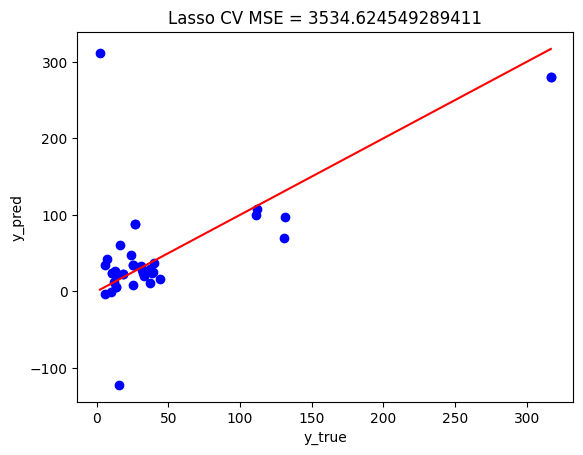

In [9]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Lasso')

# Tree

In [46]:
tree = DecisionTreeRegressor(random_state=4)
params = {
    'max_depth': [2, 3, 5, 7, 9, 11],
    'min_samples_leaf':[1, 2]
}

grid = GridSearchCV(tree, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 12 candidates, totalling 468 fits
[CV 1/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 1/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-40.777 total time=   0.0s
[CV 2/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 2/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-217.654 total time=   0.0s
[CV 3/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 3/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-140.049 total time=   0.0s
[CV 4/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 4/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-108.886 total time=   0.0s
[CV 5/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 5/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-100.361 total time=   0.0s
[CV 6/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 6/39; 1/

[CV 6/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-2.730 total time=   0.0s
[CV 7/39; 4/12] START max_depth=3, min_samples_leaf=2...........................
[CV 7/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-39.736 total time=   0.0s
[CV 8/39; 4/12] START max_depth=3, min_samples_leaf=2...........................
[CV 8/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-5.073 total time=   0.0s
[CV 9/39; 4/12] START max_depth=3, min_samples_leaf=2...........................
[CV 9/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-91.175 total time=   0.0s
[CV 10/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 10/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-71.688 total time=   0.0s
[CV 11/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 11/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-203.288 total time=   0.0s
[CV 12/39; 4/12] START max_depth=3, min_samples_leaf=2..................

[CV 18/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-38.430 total time=   0.0s
[CV 19/39; 7/12] START max_depth=7, min_samples_leaf=1..........................
[CV 19/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 20/39; 7/12] START max_depth=7, min_samples_leaf=1..........................
[CV 20/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-5.412 total time=   0.0s
[CV 21/39; 7/12] START max_depth=7, min_samples_leaf=1..........................
[CV 21/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-11.396 total time=   0.0s
[CV 22/39; 7/12] START max_depth=7, min_samples_leaf=1..........................
[CV 22/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-5.489 total time=   0.0s
[CV 23/39; 7/12] START max_depth=7, min_samples_leaf=1..........................
[CV 23/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 24/39; 7/12] START max_depth=7, min_samples_leaf=1.................

[CV 34/39; 10/12] END max_depth=9, min_samples_leaf=2;, score=-28.103 total time=   0.0s
[CV 35/39; 10/12] START max_depth=9, min_samples_leaf=2.........................
[CV 35/39; 10/12] END max_depth=9, min_samples_leaf=2;, score=-60.536 total time=   0.0s
[CV 36/39; 10/12] START max_depth=9, min_samples_leaf=2.........................
[CV 36/39; 10/12] END max_depth=9, min_samples_leaf=2;, score=-0.085 total time=   0.0s
[CV 37/39; 10/12] START max_depth=9, min_samples_leaf=2.........................
[CV 37/39; 10/12] END max_depth=9, min_samples_leaf=2;, score=-0.914 total time=   0.0s
[CV 38/39; 10/12] START max_depth=9, min_samples_leaf=2.........................
[CV 38/39; 10/12] END max_depth=9, min_samples_leaf=2;, score=-8574.630 total time=   0.0s
[CV 39/39; 10/12] START max_depth=9, min_samples_leaf=2.........................
[CV 39/39; 10/12] END max_depth=9, min_samples_leaf=2;, score=-1757.235 total time=   0.0s
[CV 1/39; 11/12] START max_depth=11, min_samples_leaf=1....

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000022E7BDE3990>,
             estimator=DecisionTreeRegressor(random_state=4),
             param_grid={'max_depth': [2, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [31]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 1}

In [24]:
# Uncomment to get model
# tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=1)

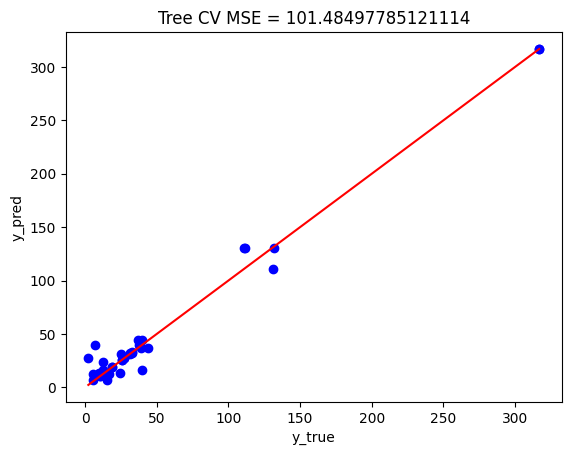

In [47]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Tree')

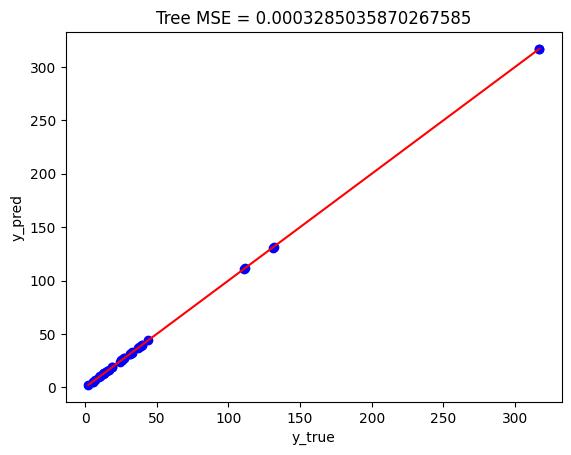

In [48]:
plot_result(grid.best_estimator_, X, y,metric=mse, title='Tree')

In [49]:
dump(grid.best_estimator_, 'tree_mr_m7c3_d101.joblib')

['tree_mr_m7c3_d101.joblib']

# RF

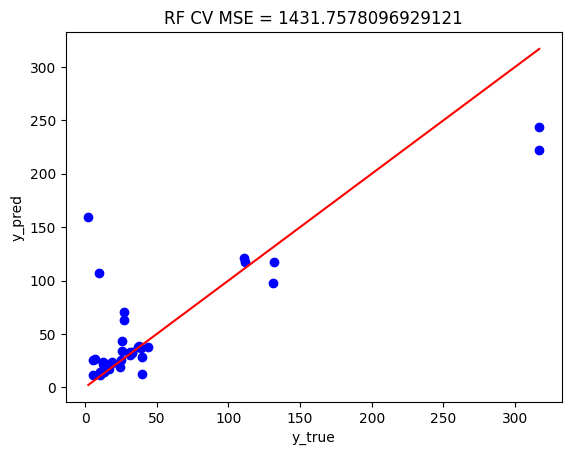

In [50]:
rf = RandomForestRegressor(random_state=42)
cross_validate_and_plot(rf, X, y, cv=lo, metric=mse, title='RF')

# CB

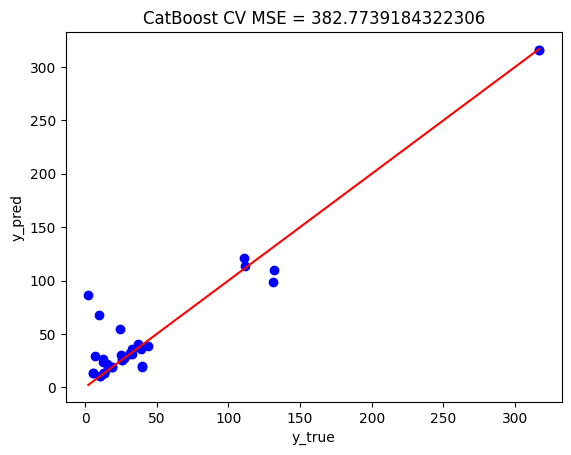

In [51]:
cb = CatBoostRegressor(verbose=0)
cross_validate_and_plot(cb, X, y, cv=lo, metric=mse, title='CatBoost')